In [1]:
# These lines are necessary only if GemPy is not installed
import sys, os
sys.path.append("../../..")
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
os.environ['MKL_THREADING_LAYER'] = 'GNU'

# Importing GemPy, which takes really long
import gempy as gp

# Importing auxiliary libraries
import numpy as np
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import scipy.stats
from scipy import spatial
from scipy import optimize
from scipy import special

C:\Users\Jan\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
def gaussian_variogram_model_nugget(d, range_, sill):
    nugget = 0
    psill = sill
    gamma = psill * (1. - np.exp(-d**2./(range_)**2.)) + nugget
    return gamma

In [3]:
def gaussian_variogram_model(d, range_, sill):
    gamma = sill * (1. - np.exp(-(np.absolute(d)**2./(range_)**2.)))
    return gamma

In [4]:
def spherical_variogram_model(d, range_, sill):
    gamma = sill * (((1.5)*(np.absolute(d)/(range_)))-((.5)*(((np.absolute(d)/(range_)))**3)))
    index = np.where(gamma==1)[0][0]
    gamma[index:]=sill
    return gamma

In [5]:
def exponential_variogram_model(d, range_, sill):
    gamma = sill * (1. - np.exp(-(np.absolute(d)/(range_)))) 
    return gamma

In [11]:
def gaussian_covariance_model(d, range_, sill):
    cov = sill * np.exp(-(np.absolute(d)**2./(range_)**2.))
    return cov

In [17]:
def spherical_covariance_model(d, range_, sill):
    cov = sill * (1-(((1.5)*(np.absolute(d)/(range_)))-((.5)*(((np.absolute(d)/(range_)))**3))))
    index = np.where(cov==0)[0][0]
    cov[index:]=0
    return cov

In [18]:
h = np.arange(0, 3, 0.1)
range_ = 1
sill = 1

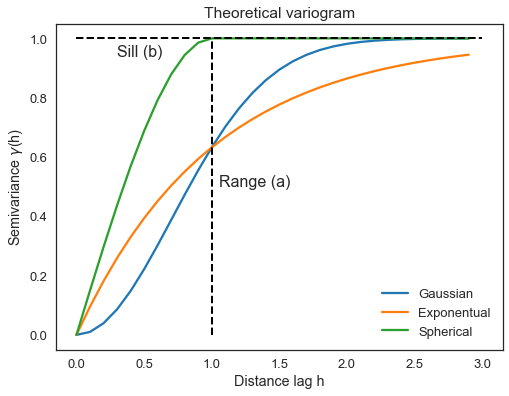

In [19]:
#plot figure
plt.figure(figsize=(8,6))
plt.xlabel("Distance lag h")
plt.ylabel("Semivariance $\gamma$(h)")
plt.title('Theoretical variogram')
plt.plot(h, gaussian_variogram_model(h, range_, sill),'-',label='Gaussian')
plt.plot(h, exponential_variogram_model(h, range_, sill),'-',label='Exponentual')
plt.plot(h, spherical_variogram_model(h, range_, sill),'-',label='Spherical')
plt.plot([0, 3], [1, 1], 'k-', lw=2, ls='dashed')
plt.plot([1, 1], [0, 1], 'k-', lw=2, ls='dashed')
plt.text(0.3,0.94,'Sill (b)',rotation=0, size='16')
plt.text(1.05,0.5,'Range (a)',rotation=0, size='16')
plt.legend(loc ='best')
plt.savefig(fname='variogram_models', edgecolor='black')

In [21]:
h = np.arange(0, 2, 0.1)
range_ = 1
sill = 1

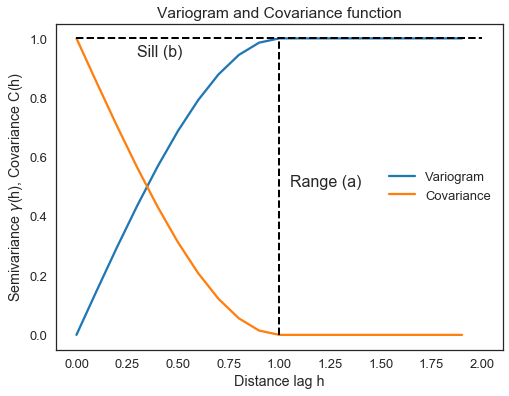

In [27]:
#plot figure
plt.figure(figsize=(8,6))
plt.xlabel("Distance lag h")
plt.ylabel("Semivariance $\gamma$(h), Covariance C(h)")
plt.title('Variogram and Covariance function')
plt.plot(h, spherical_variogram_model(h, range_, sill),'-',label='Variogram')
plt.plot(h, spherical_covariance_model(h, range_, sill),'-',label='Covariance')
plt.plot([0, 2], [1, 1], 'k-', lw=2, ls='dashed')
plt.plot([1, 1], [0, 1], 'k-', lw=2, ls='dashed')
plt.text(0.3,0.94,'Sill (b)',rotation=0, size='16')
plt.text(1.05,0.5,'Range (a)',rotation=0, size='16')
plt.legend(loc ='best')
plt.savefig(fname='vari_cov_rel', edgecolor='black')

In [56]:
def spherical_variogram_model_nugget(d, range_, sill, nugget):
    gamma = sill * (((1.5)*(np.absolute(d)/(range_)))-((.5)*(((np.absolute(d)/(range_)))**3))) + nugget
    index = np.where(gamma==1)[0][0]
    gamma[index:]=sill+nugget
    return gamma

In [61]:
h = np.arange(0, 2, 0.1)
nug = np.arange(0, 2, 0.1)
nug.fill(0.5)
range_ = 1
sill = 0.8
nugget = 0.2

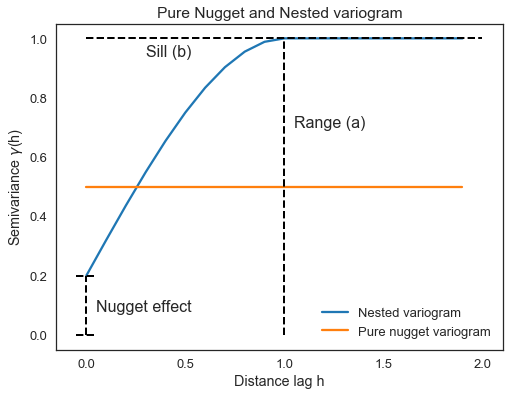

In [67]:
#plot figure
plt.figure(figsize=(8,6))
plt.xlabel("Distance lag h")
plt.ylabel("Semivariance $\gamma$(h)")
plt.title('Pure Nugget and Nested variogram')
plt.plot(h, spherical_variogram_model_nugget(h, range_, sill, nugget),'-',label='Nested variogram')
plt.plot(h, nug,'-',label='Pure nugget variogram')
plt.plot([0, 2], [1, 1], 'k-', lw=2, ls='dashed')
plt.plot([1, 1], [0, 1], 'k-', lw=2, ls='dashed')
plt.text(0.3,0.94,'Sill (b)',rotation=0, size='16')
plt.text(1.05,0.7,'Range (a)',rotation=0, size='16')
plt.text(.05,0.08,'Nugget effect',rotation=0, size='16')
plt.plot([0, 0], [0, 0.2], 'k-', lw=2, ls='dashed')
plt.plot([-0.05, 0.05], [0.2, 0.2], 'k-', lw=2, ls='dashed')
plt.plot([-0.05, 0.05], [0, 0], 'k-', lw=2, ls='dashed')
plt.legend(loc ='best')
plt.savefig(fname='nugget_nested_var', edgecolor='black')

In [ ]:
# 